In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
num_classes = 10
epochs = 20

2023-07-08 06:20:59.904899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-08 06:20:59.904940: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images, y_train), (test_images, y_test) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = train_images / 255.0, test_images / 255.0

In [3]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

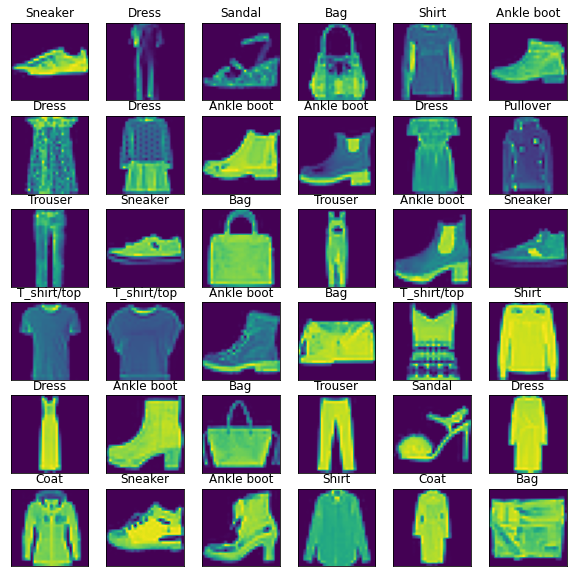

In [4]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [5]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [6]:
# Create a Sequential model
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),  
    # Add a convolutional layer with 32 filters, each having a 3x3 kernel size
    # Apply ReLU activation function to introduce non-linearity
    # Specify the input shape of the first layer as 'image_shape'

    MaxPooling2D(pool_size=2),  
    # Add a max pooling layer to downsample the output by taking the maximum value in each 2x2 region
    # Reduces the spatial dimensions, resulting in a 14x14 output

    Dropout(0.2),  
    # Add a dropout layer to randomly disable 20% of the neurons during training
    # Helps prevent overfitting by reducing co-adaptation between neurons

    Flatten(),  
    # Flatten the multi-dimensional output into a 1-dimensional vector
    # Converts the output into a suitable format for feeding into a fully connected layer

    Dense(32, activation='relu'),  
    # Add a fully connected layer with 32 units/neurons
    # Apply ReLU activation function to introduce non-linearity

    Dense(10, activation='softmax')  
    # Add a final fully connected layer with 10 units/neurons (corresponding to the number of classes)
    # Apply softmax activation function to obtain class probabilities
])

2023-07-08 06:21:02.675365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-08 06:21:02.675402: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-08 06:21:02.675422: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (driver): /proc/driver/nvidia/version does not exist
2023-07-08 06:21:02.675652: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [9]:
%%time
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 [==============================] - 17s 1s/step - loss: 1.7279 - accuracy: 0.4882 - val_loss: 1.1872 - val_accuracy: 0.6267
Epoch 2/75
12/12 [==============================] - 16s 1s/step - loss: 0.9194 - accuracy: 0.7064 - val_loss: 0.7056 - val_accuracy: 0.7653
Epoch 3/75
12/12 [==============================] - 16s 1s/step - loss: 0.6247 - accuracy: 0.7883 - val_loss: 0.5616 - val_accuracy: 0.8087
Epoch 4/75
12/12 [==============================] - 16s 1s/step - loss: 0.5357 - accuracy: 0.8136 - val_loss: 0.5039 - val_accuracy: 0.8288
Epoch 5/75
12/12 [==============================] - 16s 1s/step - loss: 0.4942 - accuracy: 0.8277 - val_loss: 0.4686 - val_accuracy: 0.8397
Epoch 6/75
12/12 [==============================] - 16s 1s/step - loss: 0.4656 - accuracy: 0.8382 - val_loss: 0.4439 - val_accuracy: 0.8488
Epoch 7/75
12/12 [==============================] - 16s 1s/step - loss: 0.4491 - accuracy: 0.8443 - val_loss: 0.4308 - val_accuracy: 0.8531
Epoch 8/75
12/12 [==

Text(0.5, 1.0, 'Train - Accuracy')

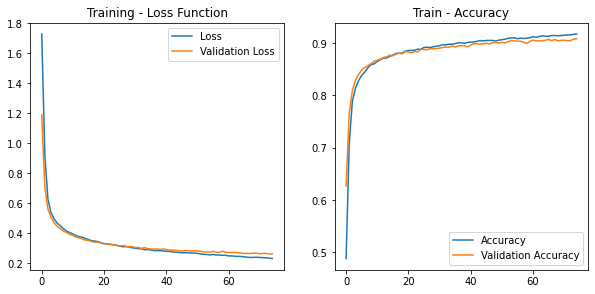

In [10]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [11]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1]*100) + '%')

Test Accuracy : 89.62%


In [13]:
cnn_model.save(f"fashion_model.h5")

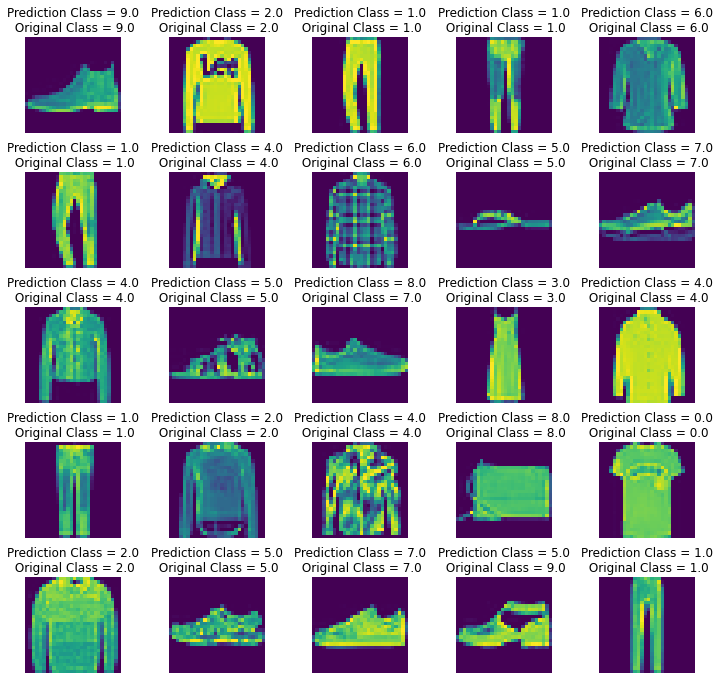

In [14]:
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)